In [1]:
import pandas as pd
import requests
from tqdm import tqdm
from  bs4 import BeautifulSoup as soup 
import matplotlib.pyplot as plt 

In [2]:
API = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
size = 100

reviews = []

def scrape_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        content = response.content
        parsed_content = soup(content, 'html.parser')
        for para in parsed_content.find_all("div", {"class": "text_content"}):
            reviews.append(para.get_text())
    except requests.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except Exception as err:
        print(f"Other error occurred: {err}")

def scrape_pages_recursive(page_num):
    if page_num > pages:
        return
    url = f"{API}/page/{page_num}/?sortby=post_date%3ADesc&pagesize={size}"
    scrape_page(url)
    # Update tqdm progress bar
    progress.update(100 / pages)
    scrape_pages_recursive(page_num + 1)

# Initialize tqdm progress bar
with tqdm(total=100, desc="Scraping pages", unit="%") as progress:
    scrape_pages_recursive(1)

print(f"Total reviews: {len(reviews)}")

Scraping pages: 100%|██████████| 100.0/100 [00:35<00:00,  2.79%/s]

Total reviews: 3763


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,"✅ Trip Verified | BA First, it's not even the..."
1,✅ Trip Verified | The worst business class ex...
2,Not Verified | Quite possibly the worst busin...
3,Not Verified | I will never be flying with BA...
4,✅ Trip Verified | On the my trip to Mexico Ci...
...,...
3758,LHR-JFK-LAX-LHR. Check in was ok apart from be...
3759,LHR to HAM. Purser addresses all club passenge...
3760,My son who had worked for British Airways urge...
3761,London City-New York JFK via Shannon on A318 b...


In [4]:
#Remove text before "|"
df['reviews'] = df['reviews'].str.replace(r'^.*\|', '', regex=True)
df

,reviews
0,"BA First, it's not even the best business cl..."
1,The worst business class experience. Ground ...
2,Quite possibly the worst business class I ha...
3,I will never be flying with BA again. This i...
4,"On the my trip to Mexico City, I had the opp..."
...,...
3758,LHR-JFK-LAX-LHR. Check in was ok apart from be...
3759,LHR to HAM. Purser addresses all club passenge...
3760,My son who had worked for British Airways urge...
3761,London City-New York JFK via Shannon on A318 b...


Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

In [5]:
import re
def clean(text):
    # Removes all non-alphabetical characters
    cleaned_text = re.sub(r'[^A-Za-z\s]', '', str(text))
    return cleaned_text

# Cleaning the text in the 'reviews' column and creating a new column 'Cleaned Reviews'
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df

,reviews,Cleaned Reviews
0,"BA First, it's not even the best business cl...",BA First its not even the best business clas...
1,The worst business class experience. Ground ...,The worst business class experience Ground c...
2,Quite possibly the worst business class I ha...,Quite possibly the worst business class I ha...
3,I will never be flying with BA again. This i...,I will never be flying with BA again This is...
4,"On the my trip to Mexico City, I had the opp...",On the my trip to Mexico City I had the oppo...
...,...,...
3758,LHR-JFK-LAX-LHR. Check in was ok apart from be...,LHRJFKLAXLHR Check in was ok apart from being ...
3759,LHR to HAM. Purser addresses all club passenge...,LHR to HAM Purser addresses all club passenger...
3760,My son who had worked for British Airways urge...,My son who had worked for British Airways urge...
3761,London City-New York JFK via Shannon on A318 b...,London CityNew York JFK via Shannon on A but h...


In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet

# Download necessary NLTK resources
nltk.download('punkt', 'stopwords', 'wordnet', 'omw-1.4', 'averaged_perceptron_tagger')


True

In [7]:
# Define a mapping for POS tagging
pos_dict = {'J': wordnet.ADJ, 'V': wordnet.VERB, 'N': wordnet.NOUN, 'R': wordnet.ADV}

def tokenize_stop_pos(text):
    """
    Tokenize the text, remove stopwords, and perform POS tagging.
    """
    tags = pos_tag(word_tokenize(text))
    token_stop_pos_list = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            token_stop_pos_list.append((word, pos_dict.get(tag[0], wordnet.NOUN)))
    return token_stop_pos_list

df['POS tagged'] = df['Cleaned Reviews'].apply(tokenize_stop_pos)
df

,reviews,Cleaned Reviews,POS tagged
0,"BA First, it's not even the best business cl...",BA First its not even the best business clas...,"[(BA, n), (First, n), (even, r), (best, a), (b..."
1,The worst business class experience. Ground ...,The worst business class experience Ground c...,"[(worst, a), (business, n), (class, n), (exper..."
2,Quite possibly the worst business class I ha...,Quite possibly the worst business class I ha...,"[(Quite, r), (possibly, r), (worst, a), (busin..."
3,I will never be flying with BA again. This i...,I will never be flying with BA again This is...,"[(never, r), (flying, v), (BA, n), (first, a),..."
4,"On the my trip to Mexico City, I had the opp...",On the my trip to Mexico City I had the oppo...,"[(trip, n), (Mexico, n), (City, n), (opportuni..."
...,...,...,...
3758,LHR-JFK-LAX-LHR. Check in was ok apart from be...,LHRJFKLAXLHR Check in was ok apart from being ...,"[(LHRJFKLAXLHR, n), (Check, n), (ok, a), (apar..."
3759,LHR to HAM. Purser addresses all club passenge...,LHR to HAM Purser addresses all club passenger...,"[(LHR, n), (HAM, n), (Purser, n), (addresses, ..."
3760,My son who had worked for British Airways urge...,My son who had worked for British Airways urge...,"[(son, n), (worked, v), (British, a), (Airways..."
3761,London City-New York JFK via Shannon on A318 b...,London CityNew York JFK via Shannon on A but h...,"[(London, n), (CityNew, n), (York, n), (JFK, n..."


In [8]:
from nltk.stem import WordNetLemmatizer

# Creating an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(pos_tagged_text):
    # Initializing an empty string for the lemmatized words
    lemma_rew = ""
    
    # Iterating over each word and its part of speech tag in the text
    for word, pos in pos_tagged_text:
        # If the part of speech tag is None, the word is added as it is
        if not pos:
            lemma = word
        # If the part of speech tag is present, the word is lemmatized
        else:
            lemma = lemmatizer.lemmatize(word, pos=pos)
        
        # Adding the lemmatized word to the string
        lemma_rew += " " + lemma
    
    # Returning the string of lemmatized words
    return lemma_rew.strip()

# Applying the function to the 'POS tagged' column and storing the result in a new column 'Lemmatized Text'
df['Lemmatized Text'] = df['POS tagged'].apply(lemmatize_text)
df

,reviews,Cleaned Reviews,POS tagged,Lemmatized Text
0,"BA First, it's not even the best business cl...",BA First its not even the best business clas...,"[(BA, n), (First, n), (even, r), (best, a), (b...",BA First even best business class sky Cabin lo...
1,The worst business class experience. Ground ...,The worst business class experience Ground c...,"[(worst, a), (business, n), (class, n), (exper...",bad business class experience Ground crew Sing...
2,Quite possibly the worst business class I ha...,Quite possibly the worst business class I ha...,"[(Quite, r), (possibly, r), (worst, a), (busin...",Quite possibly bad business class ever fly bar...
3,I will never be flying with BA again. This i...,I will never be flying with BA again This is...,"[(never, r), (flying, v), (BA, n), (first, a),...",never fly BA first last fly Singapore transit ...
4,"On the my trip to Mexico City, I had the opp...",On the my trip to Mexico City I had the oppo...,"[(trip, n), (Mexico, n), (City, n), (opportuni...",trip Mexico City opportunity experience BA lon...
...,...,...,...,...
3758,LHR-JFK-LAX-LHR. Check in was ok apart from be...,LHRJFKLAXLHR Check in was ok apart from being ...,"[(LHRJFKLAXLHR, n), (Check, n), (ok, a), (apar...",LHRJFKLAXLHR Check ok apart snap early check c...
3759,LHR to HAM. Purser addresses all club passenge...,LHR to HAM Purser addresses all club passenger...,"[(LHR, n), (HAM, n), (Purser, n), (addresses, ...",LHR HAM Purser address club passenger name boa...
3760,My son who had worked for British Airways urge...,My son who had worked for British Airways urge...,"[(son, n), (worked, v), (British, a), (Airways...",son work British Airways urge fly British Airw...
3761,London City-New York JFK via Shannon on A318 b...,London CityNew York JFK via Shannon on A but h...,"[(London, n), (CityNew, n), (York, n), (JFK, n...",London CityNew York JFK via Shannon really nic...


In [9]:
df[['reviews','Lemmatized Text']]

,reviews,Lemmatized Text
0,"BA First, it's not even the best business cl...",BA First even best business class sky Cabin lo...
1,The worst business class experience. Ground ...,bad business class experience Ground crew Sing...
2,Quite possibly the worst business class I ha...,Quite possibly bad business class ever fly bar...
3,I will never be flying with BA again. This i...,never fly BA first last fly Singapore transit ...
4,"On the my trip to Mexico City, I had the opp...",trip Mexico City opportunity experience BA lon...
...,...,...
3758,LHR-JFK-LAX-LHR. Check in was ok apart from be...,LHRJFKLAXLHR Check ok apart snap early check c...
3759,LHR to HAM. Purser addresses all club passenge...,LHR HAM Purser address club passenger name boa...
3760,My son who had worked for British Airways urge...,son work British Airways urge fly British Airw...
3761,London City-New York JFK via Shannon on A318 b...,London CityNew York JFK via Shannon really nic...


In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Initialize the Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis and categorize sentiment
def analyze_sentiment(review):
    """
    Perform sentiment analysis and categorize sentiment.
    """
    # Perform sentiment analysis
    vs = analyzer.polarity_scores(review)
    
    # Categorize sentiment
    if vs['compound'] >= 0.5:
        analysis =  'Positive'
    elif vs['compound'] < 0:
        analysis = 'Negative'
    else:
        analysis = 'Neutral'

    return analysis, vs['compound']    

# Apply sentiment analysis and categorization to the 'Lemma' column
df['Ratings'], df['Sentiment Score'] = zip(*df['Lemmatized Text'].apply(analyze_sentiment))
df

,reviews,Cleaned Reviews,POS tagged,Lemmatized Text,Ratings,Sentiment Score
0,"BA First, it's not even the best business cl...",BA First its not even the best business clas...,"[(BA, n), (First, n), (even, r), (best, a), (b...",BA First even best business class sky Cabin lo...,Neutral,0.4148
1,The worst business class experience. Ground ...,The worst business class experience Ground c...,"[(worst, a), (business, n), (class, n), (exper...",bad business class experience Ground crew Sing...,Positive,0.8700
2,Quite possibly the worst business class I ha...,Quite possibly the worst business class I ha...,"[(Quite, r), (possibly, r), (worst, a), (busin...",Quite possibly bad business class ever fly bar...,Positive,0.8777
3,I will never be flying with BA again. This i...,I will never be flying with BA again This is...,"[(never, r), (flying, v), (BA, n), (first, a),...",never fly BA first last fly Singapore transit ...,Negative,-0.9337
4,"On the my trip to Mexico City, I had the opp...",On the my trip to Mexico City I had the oppo...,"[(trip, n), (Mexico, n), (City, n), (opportuni...",trip Mexico City opportunity experience BA lon...,Positive,0.9303
...,...,...,...,...,...,...
3758,LHR-JFK-LAX-LHR. Check in was ok apart from be...,LHRJFKLAXLHR Check in was ok apart from being ...,"[(LHRJFKLAXLHR, n), (Check, n), (ok, a), (apar...",LHRJFKLAXLHR Check ok apart snap early check c...,Positive,0.6635
3759,LHR to HAM. Purser addresses all club passenge...,LHR to HAM Purser addresses all club passenger...,"[(LHR, n), (HAM, n), (Purser, n), (addresses, ...",LHR HAM Purser address club passenger name boa...,Positive,0.7703
3760,My son who had worked for British Airways urge...,My son who had worked for British Airways urge...,"[(son, n), (worked, v), (British, a), (Airways...",son work British Airways urge fly British Airw...,Positive,0.7579
3761,London City-New York JFK via Shannon on A318 b...,London CityNew York JFK via Shannon on A but h...,"[(London, n), (CityNew, n), (York, n), (JFK, n...",London CityNew York JFK via Shannon really nic...,Positive,0.8070


In [11]:
#Saving file in csv format.
df.to_csv("sentiment_analysis_BA.csv")

# Calculate sentiment counts
sentiment_counts = df['Ratings'].value_counts()

# Display sentiment counts
sentiment_counts

Ratings
Positive    2136
Negative    1222
Neutral      405
Name: count, dtype: int64

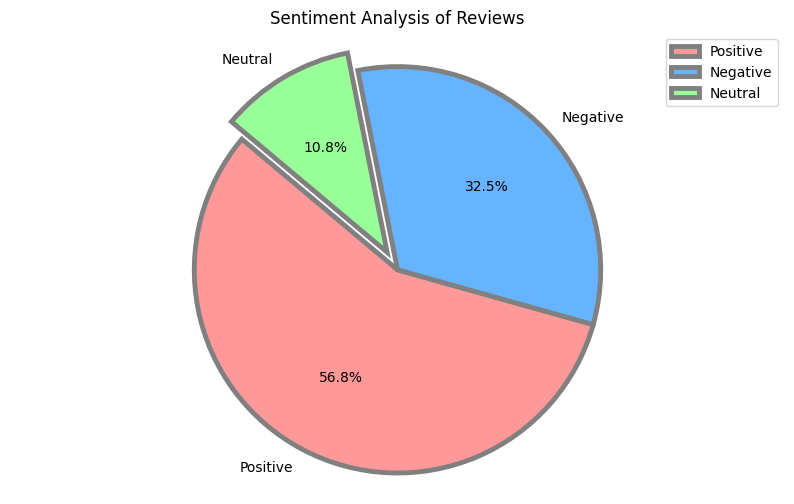

In [12]:
# Define colors for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99']

plt.figure(figsize=(10,6))

# Plot the pie chart
plt.pie(sentiment_counts.values, 
        labels=sentiment_counts.index, 
        colors=colors, 
        autopct='%1.1f%%', 
        startangle=140, 
        explode=(0, 0, 0.1),
        shadow=False,
         wedgeprops={'edgecolor': 'grey', 'linewidth': 3.5})

# Add title and legend
plt.title("Sentiment Analysis of Reviews")
plt.legend(sentiment_counts.index, loc="best")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the plot
plt.show()

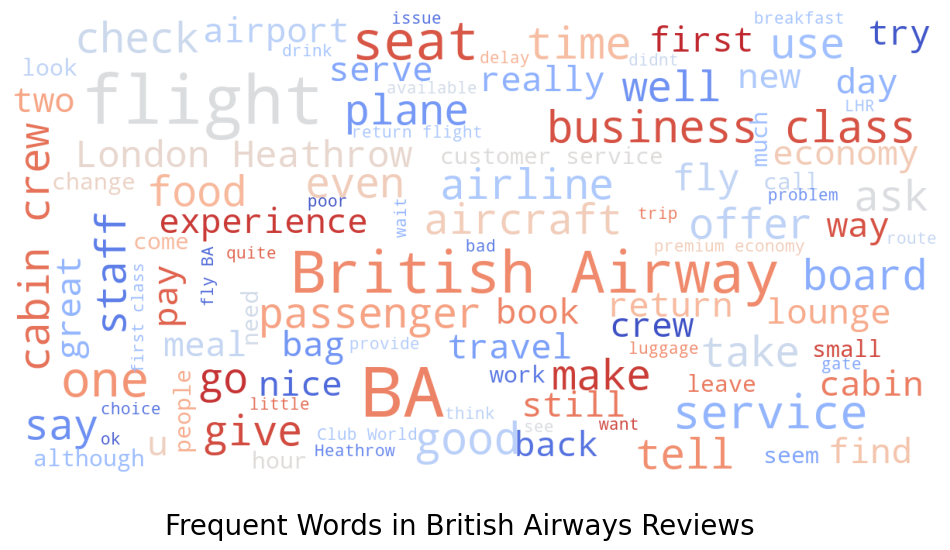

In [13]:
from wordcloud import WordCloud, STOPWORDS

# Set stopwords
stopwords = set(STOPWORDS)

def show_wordcloud(data, title=None):
    # Initialize WordCloud object
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1,
        colormap='coolwarm'  # Change colormap to 'coolwarm'
    )

    # Generate word cloud from input data
    wordcloud = wordcloud.generate(str(data))

    # Create figure
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')  # Turn off axis
    if title: 
        # Add title if specified
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)  # Adjust layout to make space for title

    # Display the word cloud
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(" ".join(df['Lemmatized Text']), title='Frequent Words in British Airways Reviews')

In [14]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import os

# Tokenize the lemmatized text
df['tokenized_text'] = df['Lemmatized Text'].apply(word_tokenize)

# Create a dictionary representation of the documents.
dictionary = Dictionary(df['tokenized_text'])

# Filter out words that occur in less than 5 documents or more than 50% of the documents.
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(text) for text in df['tokenized_text']]

# Build the LDA model
num_topics = 5  # You can adjust the number of topics as needed
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=num_topics,
                     random_state=42,
                     passes=10,  # Increasing passes might improve the model
                     iterations=100,  # Increasing iterations for better convergence
                     alpha='auto',  # Automatically set alpha
                     eta='auto')  # Automatically set eta

"""# Print the topics
print("Topics:")
for topic_id, topic_words in lda_model.print_topics():
    print(f"Topic ID: {topic_id}")
    print(topic_words)"""

# Compute coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tokenized_text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'\nCoherence Score: {coherence_lda}')

# Visualize the topics
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)


Coherence Score: 0.3693834945419162


In [15]:
# Display path to HTML file
output_html_file = "lda_visualization.html"
pyLDAvis.save_html(vis_data, output_html_file)

print(f"HTML visualization saved as: {os.path.abspath(output_html_file)}")

HTML visualization saved as: /Users/aman/Desktop/Github-Aman/Practice/BA/lda_visualization.html
